In [1]:
''' Import libraries '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from tqdm import tqdm
from IPython.display import display
from utils import *
import warnings
warnings.filterwarnings("ignore")

PATH = 'data/limonene_data.csv'
MAX_ITER = 100000
RESPONSE_VARS = ['Limonene']
INPUT_VARS = ['ATOB_ECOLI','ERG8_YEAST','IDI_ECOLI',
                   'KIME_YEAST','MVD1_YEAST','Q40322_MENSP',
                   'Q8LKJ3_ABIGR','Q9FD86_STAAU','Q9FD87_STAAU']
DBTL_A = ['2X-Mh', 'B-Lm', '2X-Ll', 'A-Mm', 'B-Ll', 'A-Mh', '2X-Lm',
       'A-Hl', '2X-Hh', 'B-Ml', 'B-Mm', '2X-Lh', 'B-Mh', '2X-Hl', 'B-Hl',
       '2X-Ml', 'B-Hm', 'B-Lh', 'B-Hh', 'A-Ll', 'A-Hm', '2X-Mm', 'A-Hh',
       'A-Ml', 'A-Lm',  'A-Lh', '2X-Hm']
DBTL_B = ['BL-Mm', 'BL-Mh', 'BL-Ml']

In [2]:
''' Read original data and transform it for analysis'''
df = read_data(PATH)
print(f'Original data shape: {df.shape}')
data = transform_data(df)
print(f'Processed data shape: {data.shape}')
# DBTL 1st cycle 
data_A = data[data.index.isin(DBTL_A)]
# DBTL 2nd cycle
data_B = data[data.index.isin(DBTL_B)] 
# Reorder columns based on specific order
data_A = data_A[INPUT_VARS + RESPONSE_VARS]
data_B = data_B[INPUT_VARS + RESPONSE_VARS]

# %%
''' Data split to train & test '''
X_train = data_A[INPUT_VARS]
y_train = data_A[RESPONSE_VARS]
X_test = data_B[INPUT_VARS]
y_test = data_B[RESPONSE_VARS]
print(f'X_train shape: {X_train.shape} \nX_test shape: {X_test.shape}')

Original data shape: (330, 3)
Processed data shape: (30, 10)
X_train shape: (27, 9) 
X_test shape: (3, 9)


DBTL 1st cycle


,ATOB_ECOLI,ERG8_YEAST,IDI_ECOLI,KIME_YEAST,MVD1_YEAST,Q40322_MENSP,Q8LKJ3_ABIGR,Q9FD86_STAAU,Q9FD87_STAAU,Limonene
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.506463,0.613107,1.592778,0.255337,1.288167,4.579011,0.749793,1.236215,1.568837,31.138563
std,0.485677,0.304444,0.623534,0.097870,0.516388,2.540150,1.155739,1.294306,1.636278,30.076129
min,0.021900,0.189900,0.714300,0.098300,0.421500,1.233200,0.060500,0.028000,0.042900,1.655130
25%,0.129900,0.381750,1.061650,0.179750,0.851100,2.978800,0.170250,0.190800,0.279250,8.829485
50%,0.238400,0.621300,1.563700,0.255500,1.263800,3.848500,0.296800,0.781600,0.748800,19.508200
75%,0.896450,0.769800,1.946900,0.349250,1.735450,5.341350,0.517450,1.677100,2.505250,52.867145
max,1.510800,1.390500,3.181300,0.401000,2.193600,11.203700,4.526700,3.977000,5.132600,104.536550


DBTL 2nd cycle


,ATOB_ECOLI,ERG8_YEAST,IDI_ECOLI,KIME_YEAST,MVD1_YEAST,Q40322_MENSP,Q8LKJ3_ABIGR,Q9FD86_STAAU,Q9FD87_STAAU,Limonene
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1.151783,0.520550,1.944997,0.951420,2.868687,9.212433,1.204113,0.233447,0.383123,84.842930
std,0.864525,0.301435,0.876059,0.528869,1.426346,5.734083,0.952767,0.171792,0.285413,67.779837
min,0.240120,0.190500,0.948840,0.380700,1.308110,2.724060,0.112370,0.050020,0.085030,6.720180
25%,0.747760,0.390175,1.619745,0.714650,2.250555,7.019055,0.872360,0.154885,0.247740,63.266925
50%,1.255400,0.589850,2.290650,1.048600,3.193000,11.314050,1.632350,0.259750,0.410450,119.813670
75%,1.607615,0.685575,2.443075,1.236780,3.648975,12.456620,1.749985,0.325160,0.532170,123.904305
max,1.959830,0.781300,2.595500,1.424960,4.104950,13.599190,1.867620,0.390570,0.653890,127.994940


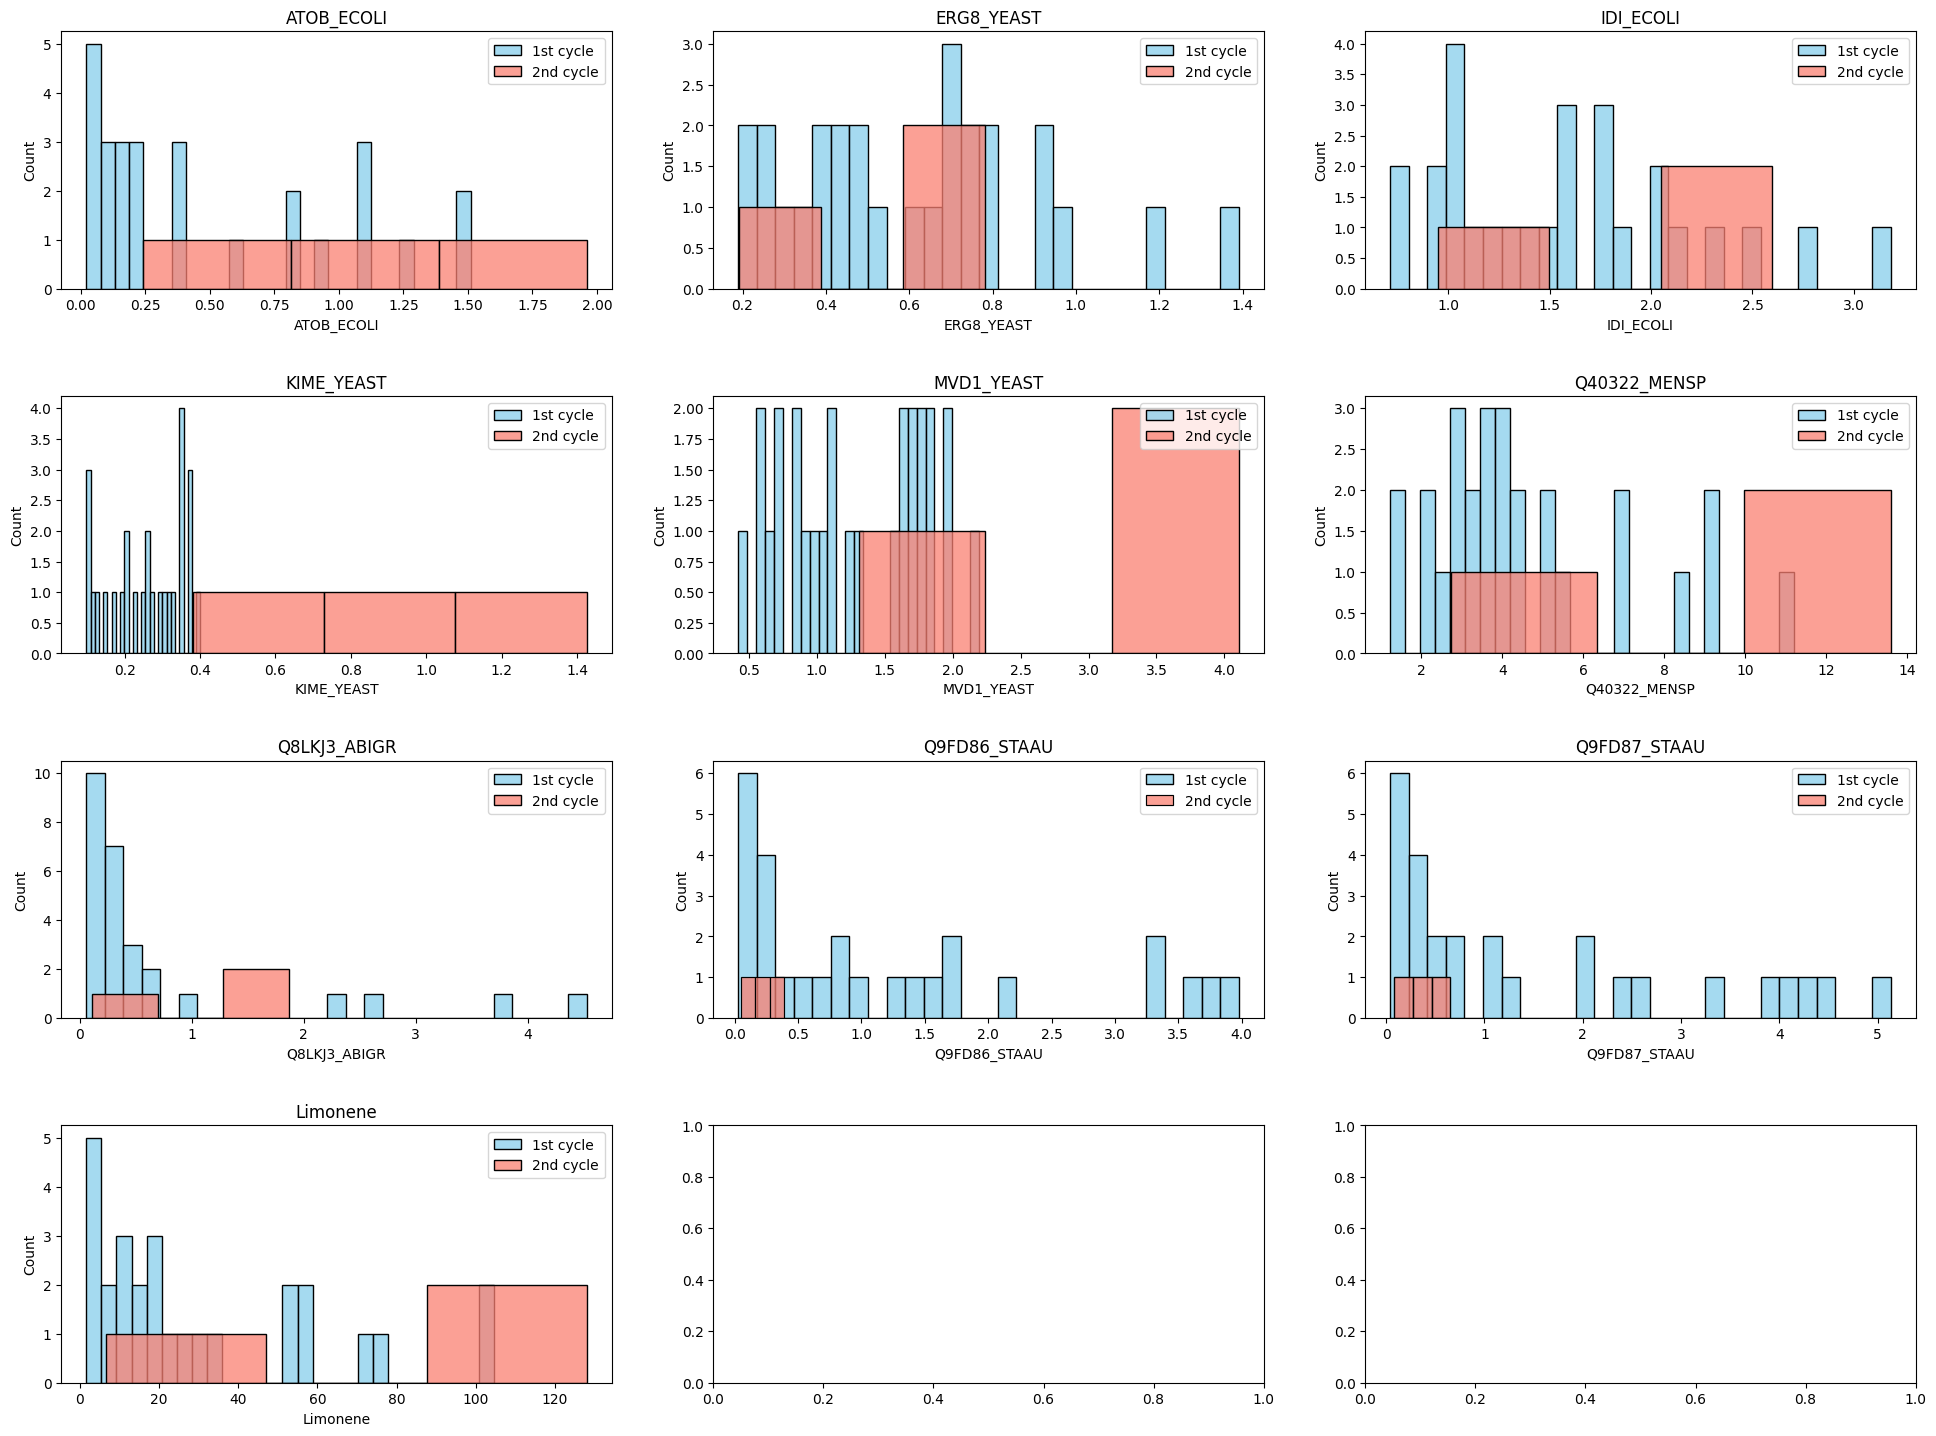

In [3]:
''' Basic data staticstics for the 2 cycles '''
print('DBTL 1st cycle')
display(data_A.describe())
print('DBTL 2nd cycle')
display(data_B.describe())

# Plot the distribution of every column of the 2 cycles; Use 4x3 grid plot
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
for i, col in enumerate(data_A.columns):
    sns.histplot(data_A[col], ax=axes[i//3, i%3], bins=len(data_A), label='1st cycle', color='skyblue')
    sns.histplot(data_B[col], ax=axes[i//3, i%3], bins=len(data_B), label='2nd cycle', color='salmon')
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].legend()
fig.tight_layout(pad=3.0)
plt.show()

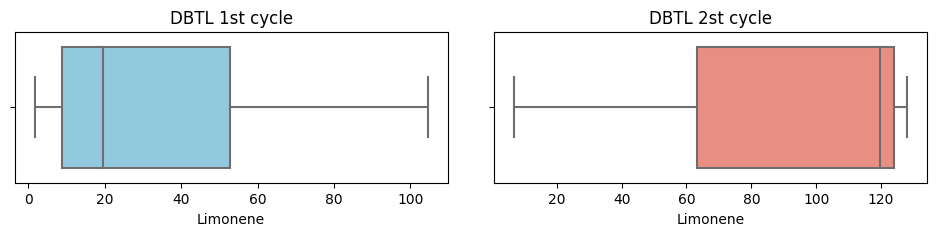

In [4]:
''' Limonene production '''
# Boxplot of limonene production; Use 2x1 grid plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(data=data_A, x='Limonene', ax=axes[0], color='skyblue')
sns.boxplot(data=data_B, x='Limonene', ax=axes[1], color='salmon')
axes[0].set_title('DBTL 1st cycle')
axes[1].set_title('DBTL 2st cycle')
fig.tight_layout(pad=3.0)
plt.show()

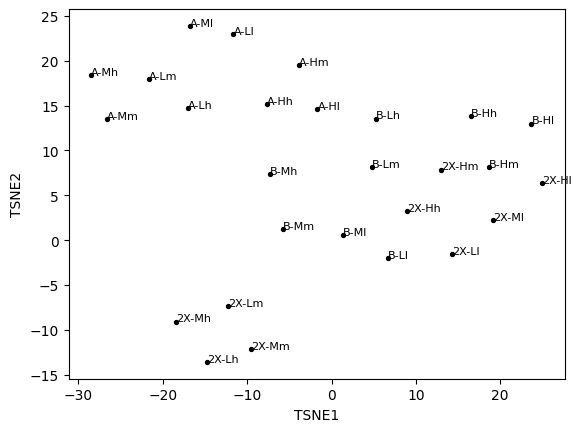

In [5]:
''' PCA and TSNE analysis '''
tsne_data_A = tsne_analysis(data_A, n_components=2)

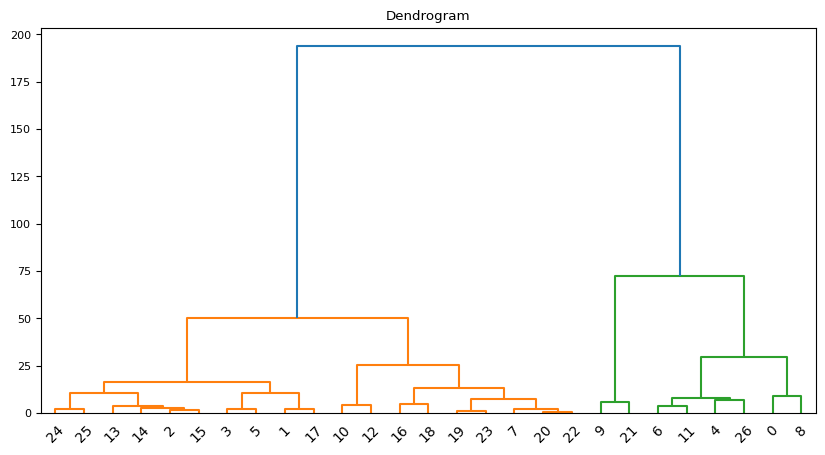

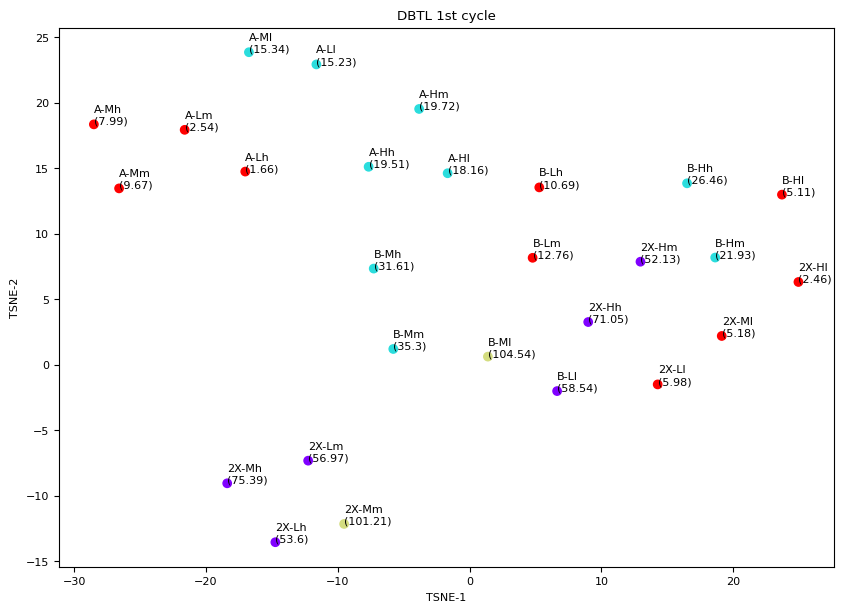

In [6]:
''' Clustering '''
# Perform hierarchical clustering on the original data using sklearn
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot dendrogram of the original data
plt.figure(figsize=(10, 5))
plt.title("Dendrogram")
dend = dendrogram(linkage(data_A, method='ward'))
plt.show()
# Based on Dendrogram we select 4 clusters
N_CLUSTERS = 4
# Create an instance of AgglomerativeClustering with 2 clusters
agg = AgglomerativeClustering(linkage='ward', n_clusters=N_CLUSTERS).fit(data_A)
clusters = agg.labels_
# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(tsne_data_A['TSNE1'], tsne_data_A['TSNE2'], c=clusters, cmap='rainbow')
plt.title('DBTL 1st cycle')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
for i, txt in enumerate(data_A.index):
    txt += f'\n({data_A["Limonene"][i].round(2)})'
    plt.annotate(txt, (tsne_data_A['TSNE1'][i], tsne_data_A['TSNE2'][i]))
plt.show()

data_A['Cluster'] = clusters

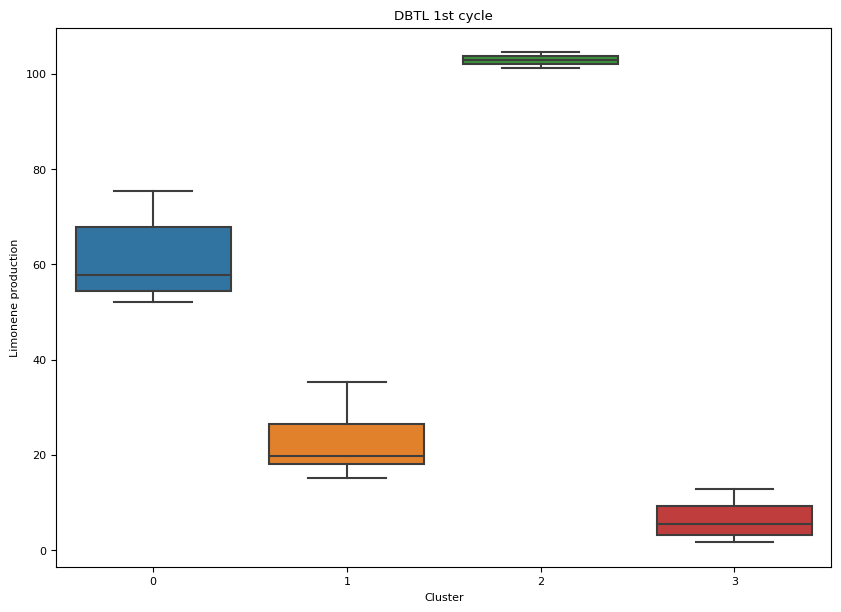

Number of instances in each cluster
0    10
1     9
2     6
3     2
Name: Cluster, dtype: int64


In [7]:
# Plot the distribution of limonene production for each cluster
plt.figure(figsize=(10, 7))
sns.boxplot(x='Cluster', y='Limonene', data=data_A)
plt.title('DBTL 1st cycle')
plt.xlabel('Cluster')
plt.ylabel('Limonene production')
plt.show()

# Change the order of the clusters based on limonene production
data_A['Cluster'] = data_A['Cluster'].map({0: 2, 1: 1, 2: 3, 3: 0})

# Number of instances in each cluster
print('Number of instances in each cluster')
print(data_A['Cluster'].value_counts())

# Save data to csv files
data_A.to_csv('data/data_A.csv')
data_B.to_csv('data/data_B.csv')
